In [16]:
import numpy as np

# Generate random data
np.random.seed(42)
X = np.random.rand(10, 2)  # 10 observations, 2 features
y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])  # Balanced classes, encoded as {-1, 1}

# Initialize weights for observations
weights = np.ones(len(X)) / len(X)

# Number of iterations (weak learners)
num_iterations = 20

# Lists to store weak classifiers, their weights, and predictions
weak_classifiers = []
alphas = []
predictions = []

for _ in range(num_iterations):
    print(f'iteration index: {_}')
    # Create a weak learner (decision stump)
    decision_stump = {'feature_index': None, 'threshold': None, 'alpha': None, 'prediction': None}
    
    # Choose a random feature
    feature_index = np.random.choice(X.shape[1])
    decision_stump['feature_index'] = feature_index
    
    # Choose a threshold for the selected feature
    threshold = np.random.uniform(min(X[:, feature_index]), max(X[:, feature_index]))
    decision_stump['threshold'] = threshold
    
    # Make predictions based on the weak learner
    prediction = np.ones(len(X))
    prediction[X[:, feature_index] <= threshold] = -1
    decision_stump['prediction'] = prediction
    
    # Calculate error
    error = np.sum(weights * (prediction != y))
    
    # Calculate alpha (classifier weight)
    alpha = 0.5 * np.log((1 - error) / max(error, 1e-10))
    decision_stump['alpha'] = alpha
    
    # Update weights
    weights = weights * np.exp(-alpha * y * prediction)
    weights /= np.sum(weights)
    
    # Save weak learner and its weight
    weak_classifiers.append(decision_stump)
    alphas.append(alpha)
    
    # Make predictions on the training data using all weak learners so far
    ensemble_prediction = np.sign(np.sum([alpha * stump['prediction'] for alpha, stump in zip(alphas, weak_classifiers)], axis=0))
    print(f'0-1 Loss: {sum(y!=ensemble_prediction)}')
    predictions.append(ensemble_prediction)

# Print results
for i in range(num_iterations):
    print(f"Iteration {i + 1} - Weak Classifier: {weak_classifiers[i]}, Alpha: {alphas[i]}, Prediction: {predictions[i]}")

# Final ensemble prediction
final_prediction = np.sign(np.sum([alpha * stump['prediction'] for alpha, stump in zip(alphas, weak_classifiers)], axis=0))
print("\nFinal Ensemble Prediction:", final_prediction)
print(f'Error Rate = {1 - sum(y == final_prediction) / 10}')

iteration index: 0
0-1 Loss: 4
iteration index: 1
0-1 Loss: 3
iteration index: 2
0-1 Loss: 3
iteration index: 3
0-1 Loss: 3
iteration index: 4
0-1 Loss: 3
iteration index: 5
0-1 Loss: 3
iteration index: 6
0-1 Loss: 3
iteration index: 7
0-1 Loss: 2
iteration index: 8
0-1 Loss: 2
iteration index: 9
0-1 Loss: 3
iteration index: 10
0-1 Loss: 3
iteration index: 11
0-1 Loss: 2
iteration index: 12
0-1 Loss: 3
iteration index: 13
0-1 Loss: 2
iteration index: 14
0-1 Loss: 2
iteration index: 15
0-1 Loss: 2
iteration index: 16
0-1 Loss: 2
iteration index: 17
0-1 Loss: 2
iteration index: 18
0-1 Loss: 2
iteration index: 19
0-1 Loss: 2
Iteration 1 - Weak Classifier: {'feature_index': 0, 'threshold': 0.34521488165208575, 'alpha': 0.2027325540540821, 'prediction': array([ 1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1.])}, Alpha: 0.2027325540540821, Prediction: [ 1.  1. -1. -1.  1. -1.  1. -1. -1.  1.]
Iteration 2 - Weak Classifier: {'feature_index': 1, 'threshold': 0.393775528889874, 'alpha': 0.44365

In [7]:
sum(y == final_prediction) / 10

0.7

In [4]:
weak_classifiers

[{'feature_index': 0,
  'threshold': 0.34521488165208575,
  'alpha': 0.2027325540540821,
  'prediction': array([ 1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1.])},
 {'feature_index': 1,
  'threshold': 0.393775528889874,
  'alpha': 0.4436515975004512,
  'prediction': array([ 1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.])},
 {'feature_index': 1,
  'threshold': 0.34545068312206806,
  'alpha': 4.440892098500624e-16,
  'prediction': array([ 1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.])}]

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


def Adaboost(
        X,
        y,
        n_iter = 20
):
    s_size = len(X)
    weights = np.ones(s_size) * (1/s_size)
    betas = np.ones(n_iter)
    errors = []
    logger = {
        'iter':[],
        'model':[]
    }

    obs_weights = {
        0 : weights
    }

    for ind in range(n_iter):
        print(ind)
        logger['iter'].append(ind)
        # Model fit
        m = DecisionTreeClassifier(max_depth=1)
        m.fit(X, y, sample_weight=weights)
        logger['model'].append(m)
        preds = m.predict(X)
        
        # Calculate in sample missclassification rate
        errors.append(np.sum([weights[j] for j in range(s_size) if preds[j] != y[j]]))
        betas[ind] = 1/2*np.log((1-errors[ind]) / errors[ind])

        # Updating sample weights
        for obs in range(s_size):
            if preds[obs] == y[obs]:
                weights[obs] = weights[obs]*np.exp(-1*betas[ind])
            else:
                weights[obs] = weights[obs]*np.exp(betas[ind])

        # Normalizing weights
        weights = weights / sum(weights)
        obs_weights[ind+1] = weights.copy()
        print(sum(obs_weights[ind+1]))
        print(sum(obs_weights[ind]))

    logger['betas'] = betas
    logger['errors'] = errors

    df_weights = pd.DataFrame(obs_weights)
    df_logger = pd.DataFrame(logger)

    return df_weights, df_logger 


In [4]:
X = np.array([[-2,-1], [-2,1], [0,0], [2,-1], [2,1]])
y = np.array([1,1,-1,1,1])

In [5]:
test_weights, logger = Adaboost(X=X, y=y)

0
1.0
0.8
1
1.0
1.0
2
1.0000000000000002
1.0
3
1.0
1.0000000000000002
4
1.0
1.0
5
1.0
1.0
6
0.9999999999999998
1.0
7
1.0
0.9999999999999998
8
0.9999999999999999
1.0
9
1.0
0.9999999999999999
10
1.0
1.0
11
1.0
1.0
12
1.0
1.0
13
1.0
1.0
14
1.0000000000000002
1.0
15
0.9999999999999998
1.0000000000000002
16
0.9999999999999999
0.9999999999999998
17
1.0000000000000002
0.9999999999999999
18
1.0
1.0000000000000002
19
1.0
1.0


In [7]:
test_weights

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.1,0.125,0.083333,0.25,0.15625,0.096154,0.250000,0.154412,0.095455,0.250000,...,0.095494,0.250000,0.154508,0.095491,0.250000,0.154509,0.095492,0.250000,0.154508,0.095492
1,0.1,0.125,0.083333,0.25,0.15625,0.096154,0.250000,0.154412,0.095455,0.250000,...,0.095494,0.250000,0.154508,0.095491,0.250000,0.154509,0.095492,0.250000,0.154508,0.095492
2,0.4,0.500,0.333333,0.20,0.50000,0.307692,0.190476,0.500000,0.309091,0.191011,...,0.309013,0.190981,0.500000,0.309017,0.190983,0.500000,0.309017,0.190983,0.500000,0.309017
3,0.1,0.125,0.250000,0.15,0.09375,0.250000,0.154762,0.095588,0.250000,0.154494,...,0.250000,0.154509,0.095492,0.250000,0.154508,0.095491,0.250000,0.154508,0.095492,0.250000
4,0.1,0.125,0.250000,0.15,0.09375,0.250000,0.154762,0.095588,0.250000,0.154494,...,0.250000,0.154509,0.095492,0.250000,0.154508,0.095491,0.250000,0.154508,0.095492,0.250000


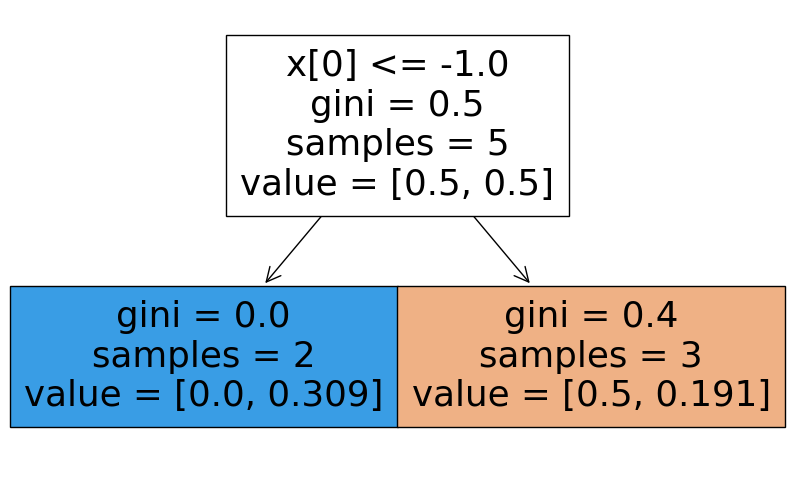

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
clf = logger.model[10]
# Assuming clf is your DecisionTreeClassifier object
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True)
plt.show()

In [17]:
y

array([ 1,  1, -1,  1,  1])

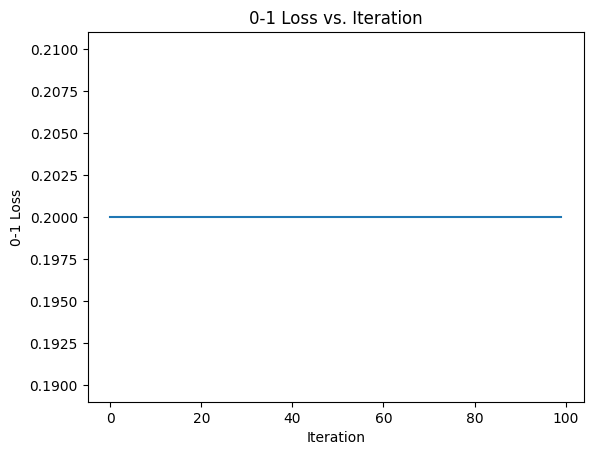

Iteration at which 0-1 loss becomes zero: 99


In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import zero_one_loss
import numpy as np

# Assuming X_train and y_train are your training data and labels
# Define your AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=1)

# Initialize variables to track loss and iteration
zero_one_losses = []
iterations = []

X_train = X
y_train = y
# Fit the classifier and monitor loss
for i in range(100):  # You can adjust the number of iterations
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    loss = zero_one_loss(y_train, y_pred)
    zero_one_losses.append(loss)
    iterations.append(i)
    if loss == 0:
        break

# Plot the loss vs. iteration
import matplotlib.pyplot as plt
plt.plot(iterations, zero_one_losses)
plt.xlabel('Iteration')
plt.ylabel('0-1 Loss')
plt.title('0-1 Loss vs. Iteration')
plt.show()

print("Iteration at which 0-1 loss becomes zero:", i)


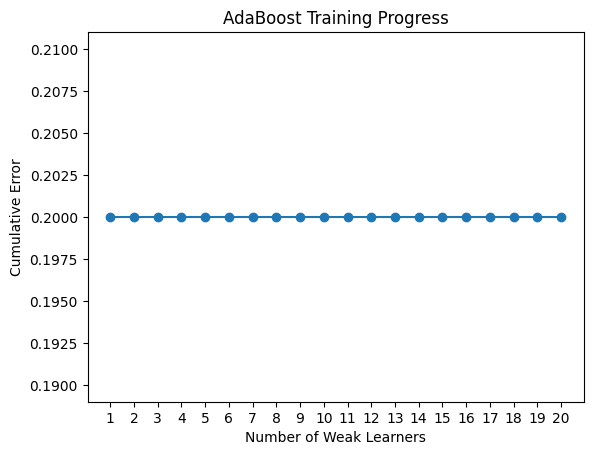

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import zero_one_loss
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data and labels
# Define your AdaBoost classifier with 20 weak learners
clf = AdaBoostClassifier(n_estimators=1)

# Initialize variables to track cumulative error
cumulative_errors = []

# Fit the classifier and monitor cumulative error
for i in range(1, 21):  # We start from 1 to include the first learner
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    error = zero_one_loss(y_train, y_pred)
    cumulative_errors.append(error)

# Plot the cumulative error
plt.plot(range(1, 21), cumulative_errors, marker='o')
plt.xlabel('Number of Weak Learners')
plt.ylabel('Cumulative Error')
plt.title('AdaBoost Training Progress')
plt.xticks(range(1, 21))
plt.show()


C:\Users\esual\AppData\Local\Temp\ipykernel_40768\645000485.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


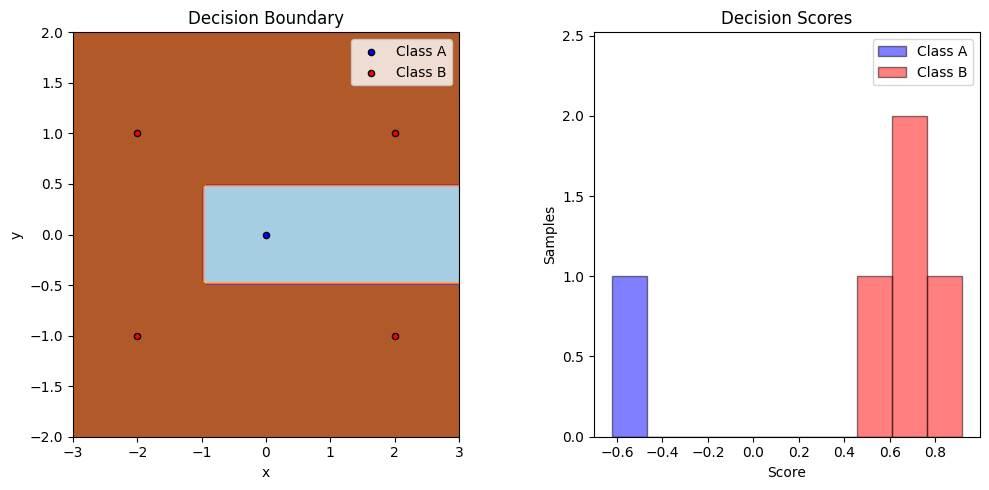

In [55]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, max_features=1), algorithm="SAMME", n_estimators=10
)
X = np.array([[-2,-1], [-2,1], [0,0], [2,-1], [2,1]])
y = np.array([1,1,0,1,1])
bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
ax = plt.subplot(121)
disp = DecisionBoundaryDisplay.from_estimator(
    bdt,
    X,
    cmap=plt.cm.Paired,
    response_method="predict",
    ax=ax,
    xlabel="x",
    ylabel="y",
)
x_min, x_max = disp.xx0.min(), disp.xx0.max()
y_min, y_max = disp.xx1.min(), disp.xx1.max()
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")

plt.title("Decision Boundary")

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(
        twoclass_output[y == i],
        bins=10,
        range=plot_range,
        facecolor=c,
        label="Class %s" % n,
        alpha=0.5,
        edgecolor="k",
    )
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc="upper right")
plt.ylabel("Samples")
plt.xlabel("Score")
plt.title("Decision Scores")

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

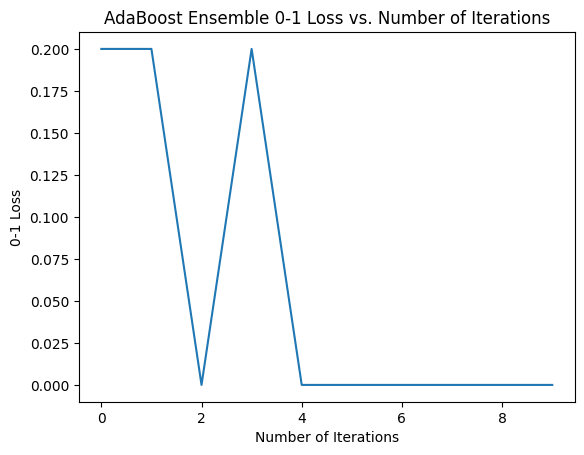

In [62]:
# Initialize lists to store 0-1 loss and iterations
losses = []
iterations = []

# Iterate through staged decision functions and compute 0-1 loss
for i, decision_function in enumerate(bdt.staged_decision_function(X)):
    y_pred = (decision_function >= 0).astype(int)  # Convert decision function to binary predictions (0 or 1)
    loss = np.mean(y_pred != y)  # Calculate 0-1 loss
    losses.append(loss)
    iterations.append(i)

# Plot 0-1 loss vs. number of iterations
plt.plot(iterations, losses)
plt.xlabel('Number of Iterations')
plt.ylabel('0-1 Loss')
plt.title('AdaBoost Ensemble 0-1 Loss vs. Number of Iterations')
plt.show()


In [60]:
decision_function

array([ 0.75669176,  0.91876587, -0.62398356,  0.45725057,  0.61932467])

In [59]:
y

array([1, 1, 0, 1, 1])

In [52]:
decision_function.shape

(5,)

In [49]:
bdt.staged_decision_function(X)

<generator object AdaBoostClassifier.staged_decision_function at 0x00000290F7E320C0>

In [78]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

test_weights, logger = Adaboost(X=data['data'], y=data['target'])

0
0.9999999999999996
0.5342243990710215
1
0.999999999999994
0.9999999999999996
2
1.0000000000000058
0.999999999999994
3
1.0000000000000056
1.0000000000000058
4
0.9999999999999947
1.0000000000000056
5
0.9999999999999938
0.9999999999999947
6
1.000000000000008
0.9999999999999938
7
1.0000000000000049
1.000000000000008
8
0.9999999999999915
1.0000000000000049
9
1.0000000000000016
0.9999999999999915
10
0.9999999999999976
1.0000000000000016
11
0.9999999999999996
0.9999999999999976
12
0.999999999999997
0.9999999999999996
13
1.0000000000000009
0.999999999999997
14
0.9999999999999998
1.0000000000000009
15
1.0000000000000007
0.9999999999999998
16
0.9999999999999994
1.0000000000000007
17
0.9999999999999978
0.9999999999999994
18
1.0000000000000002
0.9999999999999978
19
1.0000000000000009
1.0000000000000002


In [92]:
logger.model[0].predict_proba(data['data'])

array([[0.94210526, 0.05789474],
       [0.94210526, 0.05789474],
       [0.94210526, 0.05789474],
       ...,
       [0.94210526, 0.05789474],
       [0.94210526, 0.05789474],
       [0.08707124, 0.91292876]])

In [84]:
test_weights

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000509,0.000952,0.000540,0.001735,0.001144,0.000720,0.001313,0.000938,0.000648,0.000548,...,0.000692,0.000497,0.000781,0.000531,0.000369,0.000286,0.000448,0.000687,0.000487,0.000380
1,0.000509,0.000952,0.000540,0.000320,0.000211,0.000133,0.000242,0.000173,0.000119,0.000101,...,0.000103,0.000170,0.000267,0.000182,0.000324,0.000456,0.000335,0.000249,0.000176,0.000138
2,0.000509,0.000952,0.000540,0.000320,0.000211,0.000133,0.000242,0.000173,0.000119,0.000101,...,0.000056,0.000040,0.000063,0.000043,0.000030,0.000023,0.000017,0.000026,0.000019,0.000014
3,0.006071,0.011364,0.006446,0.003817,0.007893,0.004965,0.009053,0.006468,0.004469,0.003780,...,0.003857,0.002768,0.004352,0.008216,0.005708,0.008036,0.005903,0.009055,0.006417,0.005011
4,0.000509,0.000952,0.000540,0.001735,0.001144,0.000720,0.001313,0.000938,0.000648,0.000548,...,0.000692,0.001141,0.001794,0.001220,0.000848,0.000657,0.001029,0.001579,0.001119,0.000874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.000509,0.000952,0.000540,0.000320,0.000211,0.000133,0.000091,0.000065,0.000045,0.000038,...,0.000021,0.000015,0.000024,0.000016,0.000011,0.000009,0.000006,0.000010,0.000007,0.000005
565,0.000509,0.000952,0.000540,0.000320,0.000211,0.000133,0.000091,0.000065,0.000045,0.000038,...,0.000021,0.000035,0.000055,0.000037,0.000026,0.000020,0.000015,0.000023,0.000016,0.000013
566,0.000509,0.000952,0.000540,0.000320,0.000211,0.000133,0.000091,0.000065,0.000118,0.000100,...,0.000102,0.000168,0.000264,0.000180,0.000321,0.000452,0.000332,0.000509,0.000361,0.000282
567,0.000509,0.000952,0.000540,0.000320,0.000211,0.000133,0.000091,0.000065,0.000045,0.000038,...,0.000021,0.000015,0.000024,0.000016,0.000011,0.000009,0.000006,0.000010,0.000007,0.000005


In [31]:
tst[5] = 20

In [32]:
tst

array([ 1.,  1.,  1.,  1.,  1., 20.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

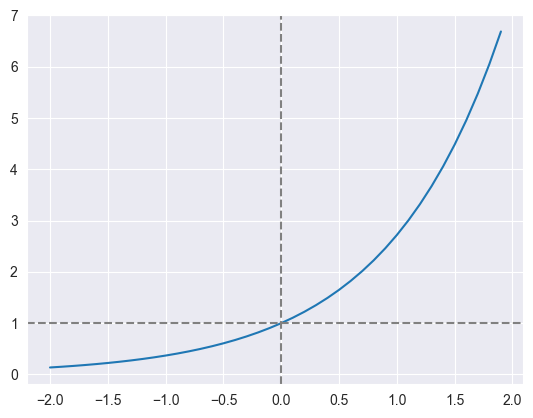

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

x = np.arange(-2,2,0.1)
y = np.exp(x)

sns.lineplot(x=x, y=y)
plt.axvline(x=0, c='grey', linestyle='--')
plt.axhline(y=1, c='grey', linestyle='--')